# 定义位置编码

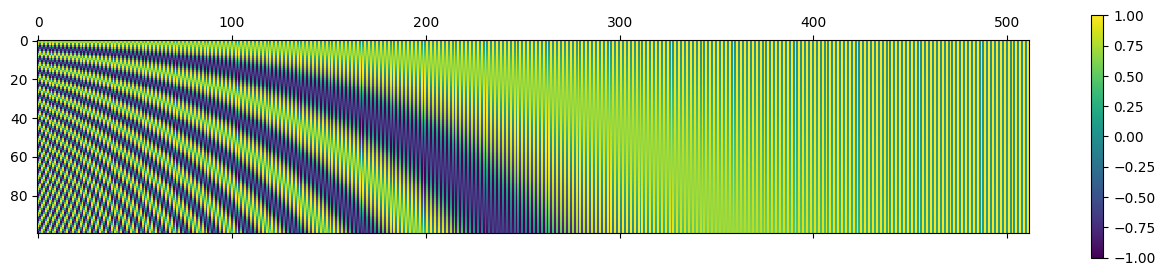

In [6]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import math,os

class PositioanalEncoding(nn.Module):
    def __init__(self, embed_dim, max_len=500):
        super(PositionalEncoding, self).__init__()
        
        ## 创建一个大小为[max_len, embed_dim]的零张量
        pe = torch.zeros(max_len, embed_dim)
        ## 创建一个形状为[max_len, 1]的位置索引张量
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        
        ## n=100, d=4
        div_term = torch.exp(torch.arrange(0, embed_dim, 2).float()*(-math.log(100)/emded_dim))
        
        pe[:, 0::2] = torch.sin(position * div_term)   ## 计算PE(pos, 2i)
        pe[:, 1::2] = torch.cos(position * div_term)   ## 计算PE(pos, 2i+1)
        pe = pe.unsqueeze(0).transpose(0, 1)
        
        ## 将位置编码张量注册为模型的缓冲区，参数不参与梯度下降，保存model的时候会将其保存下来
        self.register_buffer('pe', pe)
        
    def forward(self, x):
        ## x的形状为(seq_len, batch_size, embed_dim)
        ## 将位置编码添加到输入张量中，注意位置编码的形状
        x = x + self.pe[:x.size(0), :]
        return x
        

def getPositionEncoding(seq_len, d, n=10000):
    pe = torch.zeros(seq_len, d)
    
    position = torch.arange(0, seq_len, dtype=torch.float).unsqueeze(1)
    
    div_term = torch.exp(torch.arange(0, d, 2).float() * (-math.log(n)/d))

    pe[:, 0::2] = torch.sin(position * div_term)
    pe[:, 1::2] = torch.cos(position * div_term)
    
    return pe

P = getPositionEncoding(seq_len=100, d=512, n=1000)
cax = plt.matshow(P)
plt.gcf().colorbar(cax)


# 根据位置编码的参数打印图谱

### embed_dim：位置编码的维度（每个位置的编码向量长度）。
### max_len：最大序列长度，用于生成的位置编码矩阵的最大长度（默认为 500）。
### seq_len：当前序列的长度，用于生成位置编码。
### d：位置编码的维度，通常与嵌入层维度一致。
### n：频率缩放因子，控制位置编码中频率的变化，常用于调整编码的周期性变化